In [ ]:
import pandas as pd

mnist_csv = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None, skiprows=1).values

print(mnist_csv.shape)

(19999, 785)


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(mnist_csv, test_size=0.3, random_state=42)

In [ ]:
from tensorflow.keras import utils

# one-hot 인코딩
Y_train, X_train = utils.to_categorical(train[:,0]), train[:,1:]
Y_test, X_test = utils.to_categorical(test[:,0]), test[:,1:]

In [ ]:
X_train_norm = (X_train-0)/(255-0)
X_test_norm = (X_test-0)/(255-0)

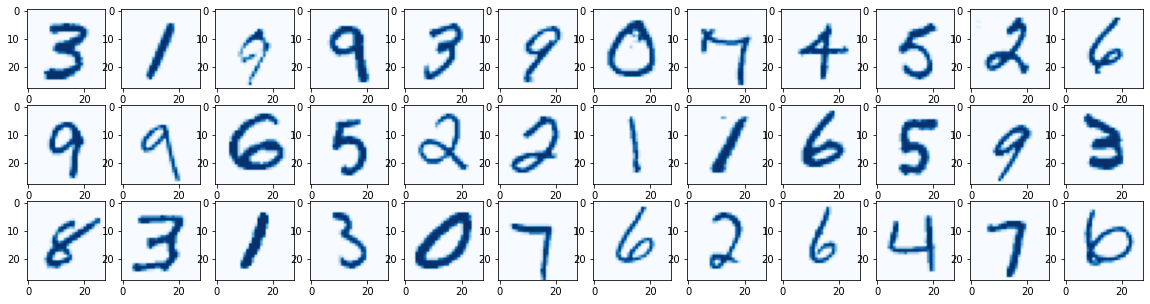

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_images(X_train):
  fig = plt.figure(figsize=(20,5))
  for i in range(36):
    ax = fig.add_subplot(3,12, i+1)
    plt.imshow(np.reshape(X_train[i], (28,28)), cmap=plt.cm.Blues)

plot_images(X_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Reshape

model = Sequential()
model.add(Reshape((28,28,1), input_shape=(X_train.shape[1],)))
model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32,(5,5), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


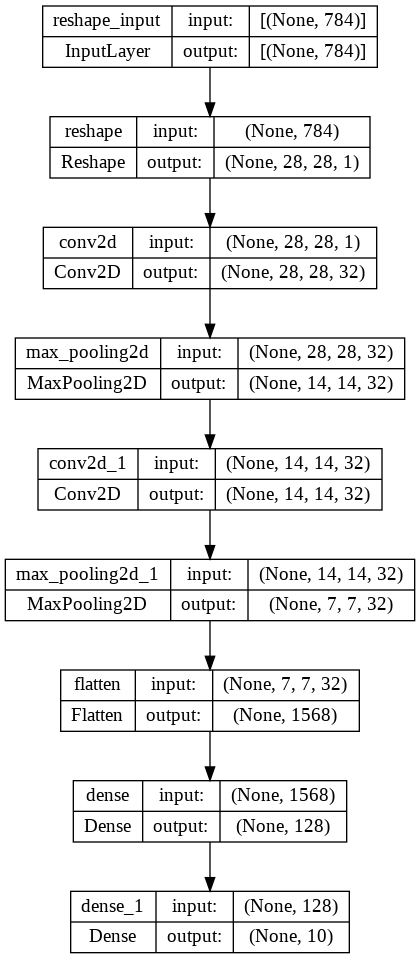

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='cnn_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=100, verbose=2, validation_data=(X_test, Y_test))
print(model_history.history.keys())

Epoch 1/100
140/140 - 9s - loss: 1.6108 - accuracy: 0.7346 - val_loss: 0.4107 - val_accuracy: 0.8722 - 9s/epoch - 67ms/step
Epoch 2/100
140/140 - 1s - loss: 0.3092 - accuracy: 0.9042 - val_loss: 0.2912 - val_accuracy: 0.9130 - 682ms/epoch - 5ms/step
Epoch 3/100
140/140 - 1s - loss: 0.2182 - accuracy: 0.9304 - val_loss: 0.2349 - val_accuracy: 0.9280 - 689ms/epoch - 5ms/step
Epoch 4/100
140/140 - 1s - loss: 0.1725 - accuracy: 0.9470 - val_loss: 0.2097 - val_accuracy: 0.9325 - 709ms/epoch - 5ms/step
Epoch 5/100
140/140 - 1s - loss: 0.1429 - accuracy: 0.9548 - val_loss: 0.1915 - val_accuracy: 0.9393 - 699ms/epoch - 5ms/step
Epoch 6/100
140/140 - 1s - loss: 0.1225 - accuracy: 0.9633 - val_loss: 0.1795 - val_accuracy: 0.9435 - 691ms/epoch - 5ms/step
Epoch 7/100
140/140 - 1s - loss: 0.1050 - accuracy: 0.9674 - val_loss: 0.1803 - val_accuracy: 0.9423 - 693ms/epoch - 5ms/step
Epoch 8/100
140/140 - 1s - loss: 0.0926 - accuracy: 0.9727 - val_loss: 0.1632 - val_accuracy: 0.9470 - 688ms/epoch - 5ms

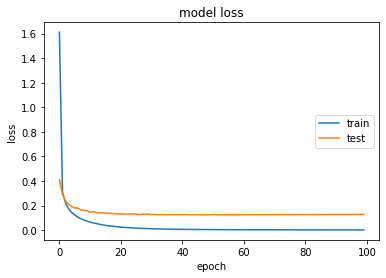

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

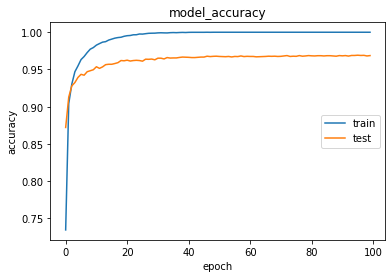

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(model_input, feature, label, class_info):
  pred=model_input.predict(feature)
  cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
  plt.figure()
  plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  tick_marks = np.arange(len(class_info))
  plt.xticks(tick_marks, class_info, rotation=45)
  plt.yticks(tick_marks, class_info)
  thresh = cnf_matrix.max()/2.

  for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j], horizontalalignment='center', color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  plt.show()

188/188 [==============================] - 1s 5ms/step


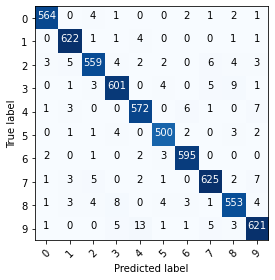

In [ ]:
class_info = list(range(10))
plot_confusion_matrix(model, X_test, Y_test, class_info=class_info)